In [1]:
import json
import pandas as pd
import networkx as nx
edges_list = set()
max_number_of_books = 50000
count = 0
G = nx.Graph()
with open('goodreads_books.json',"r") as jsonfile:
    while True:
        # if count >= max_number_of_books:
        #     break
        data = jsonfile.readline()
        if not data:
            break
        data = json.loads(data)
        authors = []
        for author in data['authors']:
            authors.append(author['author_id'])
        for author1 in authors:
            for author2 in authors:
                if author1 == author2:
                    continue
                edges_list.add((author1,author2))
        count +=1
print('almost done')
G.add_edges_from(edges_list)

almost done


In [ ]:
authors = pd.read_json('goodreads_book_authors.json')

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
print(nx.density(G))
print(G.number_of_edges())
print(G.number_of_nodes())
print('average degree:')
print((G.number_of_edges()/G.number_of_nodes()) * 2)
# print(nx.diameter(G))
# print(list(nx.eulerian_path(G)))
# print(list(nx.find_cliques(G)))

2.3771464272946216e-05
2628626
470275
average degree:
11.179101589495508


In [3]:
print('number of connected components')
connected_components = list(nx.connected_components(G))
print(len(connected_components))

number of connected components
62703


In [4]:
print(nx.average_clustering(G))

0.4608273008787331


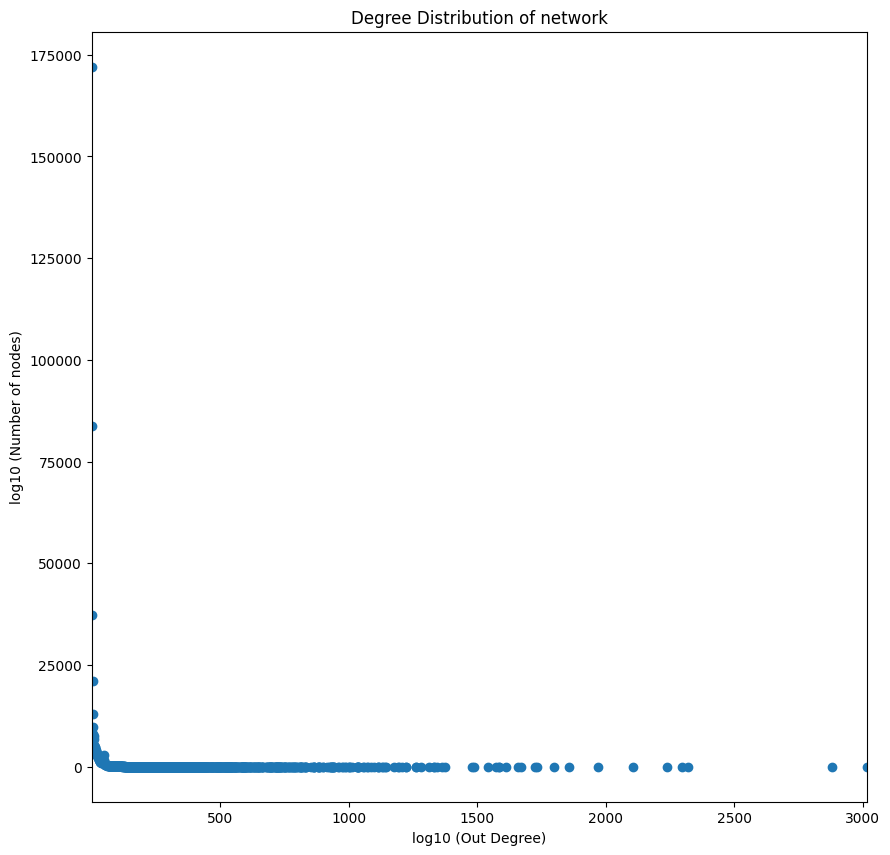

In [12]:
import numpy as np
import matplotlib.pyplot as plt
out_degrees = dict(G.degree()) # dictionary node:degree
# filtering nodes outdegree values with outdegree > 0
pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
# getting unique and sorted outdegree values
uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))
# counting frequency of each outdegree values
out_hist = [pos_out_degree_vals.count(x) for x in uq_pos_out_degree_vals]


x = np.asarray(uq_pos_out_degree_vals, dtype = float)
y = np.asarray(out_hist, dtype = float)

plt.figure(figsize=(10,10))
plt.xlim(min(x), max(x))
plt.xlabel('log10 (Out Degree)')
plt.ylabel('log10 (Number of nodes)')
plt.title('Degree Distribution of network')
out_degree_dist = plt.plot(x, y, 'o')

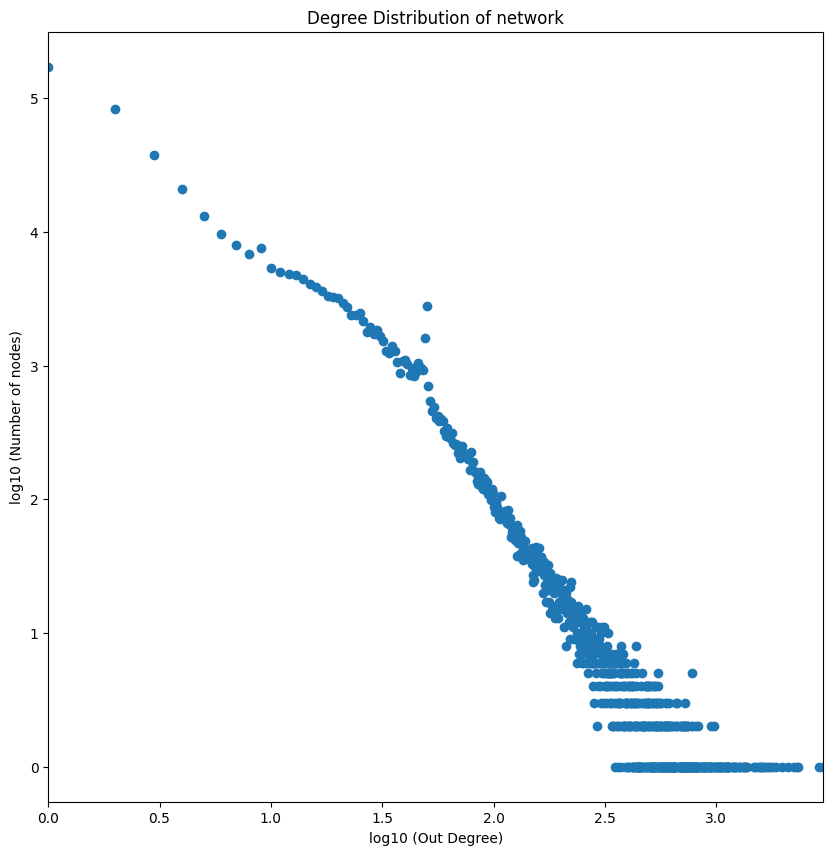

In [13]:
## degree Distribution
import numpy as np
out_degrees = dict(G.degree()) # dictionary node:degree
# filtering nodes outdegree values with outdegree > 0
pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
# getting unique and sorted outdegree values
uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))
# counting frequency of each outdegree values
out_hist = [pos_out_degree_vals.count(x) for x in uq_pos_out_degree_vals]


x = np.asarray(uq_pos_out_degree_vals, dtype = float)
y = np.asarray(out_hist, dtype = float)

logx = np.log10(x)
logy = np.log10(y)

plt.figure(figsize=(10,10))
plt.xlim(min(logx), max(logx))
plt.xlabel('log10 (Out Degree)')
plt.ylabel('log10 (Number of nodes)')
plt.title('Degree Distribution of network')
out_degree_dist = plt.plot(logx, logy, 'o')

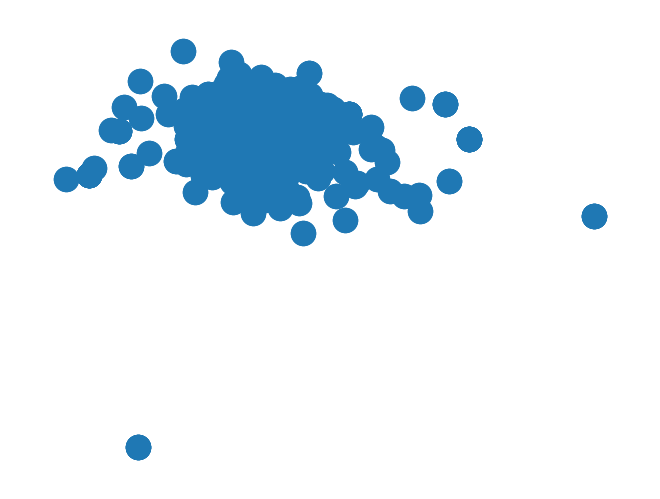

In [15]:
nx.draw_spectral(G, with_labels=False)
plt.show()

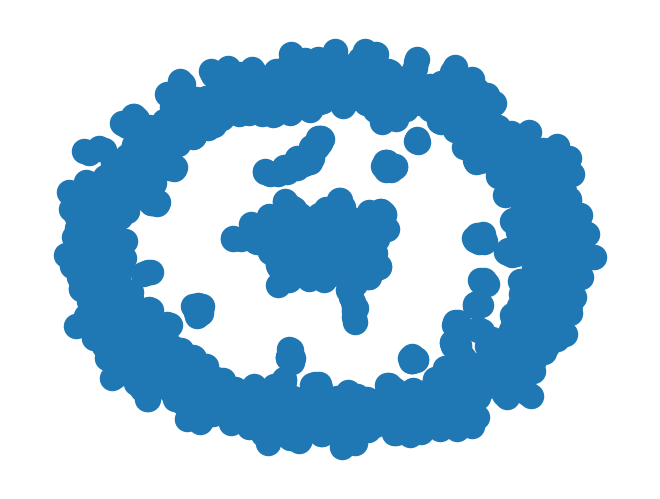

In [17]:
nx.draw_spring(G, with_labels=False)
plt.show()

In [30]:
pr = nx.pagerank(G, alpha=0.9)
pr = dict(sorted(pr.items(), key=lambda item: -item[1]))
print(pr)

{'3389': 0.027645332297415122, '5158478': 0.016941280487857893, '2448': 0.014916218941051723, '346732': 0.013155787554302804, '1244': 0.012471567964766077, '4798562': 0.012185409745933528, '2918731': 0.009554182085047921, '3354': 0.009407684617510783, '1265': 0.009152203165032726, '7581': 0.009025747886540087, '10366': 0.008954891910206451, '33919': 0.008560297875357952, '5031025': 0.00831937335923543, '37450': 0.008144094840260222, '40983': 0.007555392478779313, '1455': 0.007502178467793603, '207766': 0.0071066717415561005, '3137322': 0.0070716336468846334, '8993': 0.006540210040739844, '14965': 0.006279530662534491, '10991': 0.005636229068352012, '13557729': 0.005437511792800701, '38550': 0.005281855108981245, '656983': 0.005279917362591633, '1654': 0.005270716940364225, '13730': 0.005040469006495138, '24781': 0.005020980765764541, '45429': 0.004969097193113159, '13275': 0.0047969910556235245, '285217': 0.004795356858548884, '721481': 0.0044841701267939755, '1461': 0.0042861049126398

In [35]:
##remove non important nodes
remove = [node for node,degree in dict(G.degree()).items() if degree < 200]
G.remove_nodes_from(remove)


In [36]:
print(nx.density(G))
print(G.number_of_edges())
print(G.number_of_nodes())
print('average degree:')
print((G.number_of_edges()/G.number_of_nodes()) * 2)

0.2440169311320187
48656
632
average degree:
153.9746835443038


/tmp/ipykernel_16262/4008792558.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(important_partitions.values()) + 1)


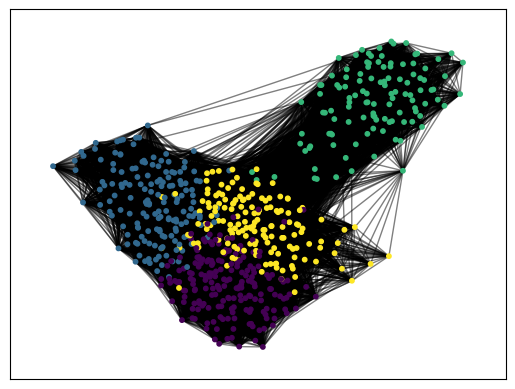

<Figure size 640x480 with 0 Axes>

In [37]:
from community import community_louvain
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import operator
from collections import Counter
# G = nx.erdos_renyi_graph(100, 0.01)
partition = community_louvain.best_partition(G)
partition_filtered = {}
partion_numbers = {}
for key,value in partition.items():
    if value not in list(partion_numbers.keys()):
        partion_numbers[value] = 1
    else:
        partion_numbers[value] += 1
partion_numbers = dict(sorted(partion_numbers.items(), key=lambda item: item[1]))

important_numbers = list(dict(Counter(partion_numbers).most_common(5)).keys())
important_partitions = {}
for key,value in partition.items():
    if value in important_numbers:
        important_partitions[key] = value

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(important_partitions.values()) + 1)
nx.draw_networkx_nodes(G, pos, important_partitions.keys(), node_size=10,
cmap=cmap, node_color=list(important_partitions.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()
plt.savefig("plot.png")

In [69]:
print(partion_numbers)

{2: 2, 8: 2, 10: 2, 12: 2, 13: 2, 15: 2, 19: 2, 21: 2, 24: 2, 26: 2, 28: 2, 38: 2, 39: 2, 40: 2, 41: 2, 46: 2, 49: 2, 57: 2, 62: 2, 65: 2, 68: 2, 71: 2, 72: 2, 76: 2, 77: 2, 79: 2, 86: 2, 87: 2, 89: 2, 91: 2, 92: 2, 93: 2, 94: 2, 96: 2, 98: 2, 99: 2, 100: 2, 101: 2, 102: 2, 103: 2, 104: 2, 105: 2, 106: 2, 110: 2, 111: 2, 112: 2, 113: 2, 116: 2, 118: 2, 120: 2, 121: 2, 122: 2, 126: 2, 127: 2, 128: 2, 129: 2, 130: 2, 131: 2, 136: 2, 137: 2, 138: 2, 141: 2, 143: 2, 144: 2, 147: 2, 148: 2, 149: 2, 151: 2, 152: 2, 153: 2, 154: 2, 155: 2, 157: 2, 158: 2, 160: 2, 161: 2, 162: 2, 163: 2, 164: 2, 165: 2, 166: 2, 167: 2, 168: 2, 169: 2, 171: 2, 172: 2, 174: 2, 175: 2, 176: 2, 177: 2, 178: 2, 179: 2, 180: 2, 181: 2, 184: 2, 185: 2, 186: 2, 187: 2, 188: 2, 189: 2, 191: 2, 192: 2, 193: 2, 194: 2, 195: 2, 196: 2, 197: 2, 198: 2, 199: 2, 200: 2, 203: 2, 204: 2, 205: 2, 207: 2, 208: 2, 210: 2, 211: 2, 213: 2, 214: 2, 215: 2, 216: 2, 219: 2, 220: 2, 221: 2, 222: 2, 223: 2, 226: 2, 228: 2, 229: 2, 230: 

In [72]:
print(partition)

{'10333': 0, '3389': 0, '7581': 0, '4798562': 0, '1161372': 0, '8988': 0, '338705': 0, '3036291': 0, '8347': 0, '1356336': 0, '1221698': 0, '8694': 1, '5989': 0, '84604': 0, '29479': 0, '27206': 0, '131208': 0, '7577': 0, '4845': 0, '25883': 0, '88506': 0, '43989': 1, '32637': 0, '137561': 2, '266721': 2, '5411': 3, '389991': 3, '208923': 3, '24263': 3, '191219': 3, '74871': 3, '10366': 0, '5158478': 4, '33919': 1, '346732': 1, '2448': 4, '13388': 5, '41180': 0, '3524': 5, '239579': 4, '58223': 4, '23069': 1, '23001': 4, '29998': 1, '9494': 4, '14403': 4, '4624490': 4, '585': 4, '16': 5, '13479797': 4, '40173': 4, '48397': 6, '22880': 6, '26813': 4, '327493': 6, '12535': 0, '18253': 4, '854076': 4, '5858': 0, '12540': 4, '83937': 6, '2687': 1, '50040': 7, '4415389': 0, '410680': 5, '38840': 4, '4764': 6, '35400': 7, '18351': 4, '7415': 6, '6941': 4, '5402064': 0, '762807': 1, '4844': 6, '76288': 4, '66700': 4, '58971': 6, '61958': 1, '1107804': 0, '36998': 4, '128466': 0, '5812661': 4,

In [70]:
important_partitions = dict(sorted(partion_numbers.iteritems(), key=operator.itemgetter(1), reverse=True)[:5])

AttributeError: 'dict' object has no attribute 'iteritems'

In [71]:
from collections import Counter
dict(Counter(partion_numbers).most_common(5))

{5: 204, 4: 192, 0: 155, 1: 154, 6: 96}